In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Normalize pixel values to [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
# Reshape for CNN input (batch_size, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [5]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64,
                    validation_split=0.1, verbose=2)


Epoch 1/10
844/844 - 41s - 49ms/step - accuracy: 0.7776 - loss: 0.6170 - val_accuracy: 0.8585 - val_loss: 0.3874
Epoch 2/10
844/844 - 41s - 48ms/step - accuracy: 0.8533 - loss: 0.4113 - val_accuracy: 0.8802 - val_loss: 0.3179
Epoch 3/10
844/844 - 43s - 51ms/step - accuracy: 0.8706 - loss: 0.3587 - val_accuracy: 0.8905 - val_loss: 0.2934
Epoch 4/10
844/844 - 80s - 95ms/step - accuracy: 0.8818 - loss: 0.3277 - val_accuracy: 0.8970 - val_loss: 0.2714
Epoch 5/10
844/844 - 40s - 47ms/step - accuracy: 0.8914 - loss: 0.3011 - val_accuracy: 0.9030 - val_loss: 0.2597
Epoch 6/10
844/844 - 42s - 50ms/step - accuracy: 0.8988 - loss: 0.2822 - val_accuracy: 0.9048 - val_loss: 0.2560
Epoch 7/10
844/844 - 39s - 47ms/step - accuracy: 0.9023 - loss: 0.2663 - val_accuracy: 0.9080 - val_loss: 0.2520
Epoch 8/10
844/844 - 41s - 48ms/step - accuracy: 0.9087 - loss: 0.2504 - val_accuracy: 0.9110 - val_loss: 0.2446
Epoch 9/10
844/844 - 41s - 49ms/step - accuracy: 0.9114 - loss: 0.2395 - val_accuracy: 0.9130 - 

In [9]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")

313/313 - 3s - 9ms/step - accuracy: 0.9078 - loss: 0.2567

Test Accuracy: 0.9078


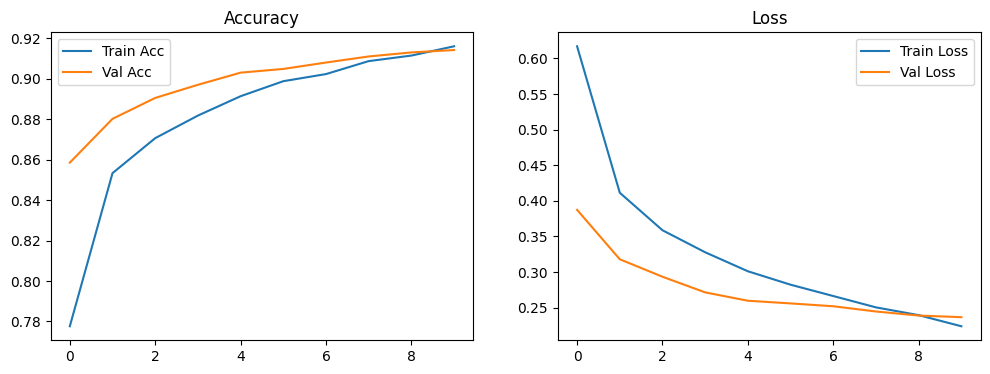

In [10]:
# Plot training history
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()